In [40]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import morton

# Initialize

## Constants

In [41]:
LANE_CHANGE_DATA_20HZ_DIR = './data/lane_changes/20hz/'
LANE_CHANGE_DATA_10HZ_DIR = './data/lane_changes/10hz/'
LANE_CHANGE_DATA_5HZ_DIR = './data/lane_changes/5hz/'
LANE_CHANGE_HZ_DIRS = [LANE_CHANGE_DATA_20HZ_DIR, LANE_CHANGE_DATA_10HZ_DIR, LANE_CHANGE_DATA_5HZ_DIR]
OFFSET = 10
FACTOR_MULTIPLY = 10000
SAMPLING_RATE_VARIATIONS = 3 # constant to denote the amount of different sampling rates that exist

## Dataframes

In [42]:
laneChange20HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange10HzDFs = [] # Will contain the dataframes for all lane changes.
laneChange5HzDFs = [] # Will contain the dataframes for all lane changes.


# Count number of files (= amt of lane changes)
numOfFiles = len([f for f in os.listdir(LANE_CHANGE_DATA_20HZ_DIR) if os.path.isfile(os.path.join(LANE_CHANGE_DATA_20HZ_DIR, f))])


# Import each csv into a dataframe
for i in range(numOfFiles):
    temp_20_df = pd.read_csv(LANE_CHANGE_DATA_20HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_10_df = pd.read_csv(LANE_CHANGE_DATA_10HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    temp_5_df = pd.read_csv(LANE_CHANGE_DATA_5HZ_DIR + "lane_change_" + str(i+1) + ".csv", sep=";")
    laneChange20HzDFs.append(temp_20_df)
    laneChange10HzDFs.append(temp_10_df)
    laneChange5HzDFs.append(temp_5_df)

# Append all arrays to a single array so that
# future data processing can be done more efficiently.
laneChangeDfs = [laneChange20HzDFs, laneChange10HzDFs, laneChange5HzDFs]



In [43]:
laneChange20HzDFs[0] # test to see if a dataframe is correct.
    

,lat,lon,speed,accel_lon,accel_trans,accel_down,ts
0,57.718799,11.958346,0.116811,-0.006275,0.003880,-0.004212,1646666793703590
1,57.718799,11.958346,0.118460,-0.047546,0.064689,0.067094,1646666793753601
2,57.718799,11.958346,0.118331,0.036616,-0.010786,-0.050694,1646666793803626
3,57.718799,11.958346,0.119788,-0.102828,0.029938,0.083196,1646666793853591
4,57.718799,11.958346,0.119016,0.039307,-0.071447,-0.126803,1646666793903600
...,...,...,...,...,...,...,...
345,57.719002,11.956873,10.502030,1.272900,0.097373,0.266211,1646666810954140
346,57.719003,11.956865,10.442500,1.212828,0.109282,0.064465,1646666811004191
347,57.719005,11.956856,10.379370,1.141930,0.053132,0.029888,1646666811054149
348,57.719006,11.956848,10.317210,1.224668,0.113335,0.232543,1646666811104176


## Morton setup

In [44]:
laneChangeDfs[0][1]
for laneChanges in laneChangeDfs:
    for df in laneChanges:
        print(df)
        df['accel_lon'] = df['accel_lon'].add(OFFSET)
        df['accel_trans'] = df['accel_trans'].add(OFFSET)
        df['accel_down'] = df['accel_down'].add(OFFSET)

        df['accel_lon'] = df.apply(lambda x: int(x['accel_lon']*FACTOR_MULTIPLY) , axis=1)
        df['accel_trans'] = df.apply(lambda x: int(x['accel_trans']*FACTOR_MULTIPLY) , axis=1)
        df['accel_down'] = df.apply(lambda x: int(x['accel_down']*FACTOR_MULTIPLY) , axis=1)



           lat        lon      speed  accel_lon  accel_trans  accel_down  \
0    57.718799  11.958346   0.116811  -0.006275     0.003880   -0.004212   
1    57.718799  11.958346   0.118460  -0.047546     0.064689    0.067094   
2    57.718799  11.958346   0.118331   0.036616    -0.010786   -0.050694   
3    57.718799  11.958346   0.119788  -0.102828     0.029938    0.083196   
4    57.718799  11.958346   0.119016   0.039307    -0.071447   -0.126803   
..         ...        ...        ...        ...          ...         ...   
345  57.719002  11.956873  10.502030   1.272900     0.097373    0.266211   
346  57.719003  11.956865  10.442500   1.212828     0.109282    0.064465   
347  57.719005  11.956856  10.379370   1.141930     0.053132    0.029888   
348  57.719006  11.956848  10.317210   1.224668     0.113335    0.232543   
349  57.719008  11.956840  10.255980   1.245987     0.201085    0.220415   

                   ts  
0    1646666793703590  
1    1646666793753601  
2    1646666793

In [45]:
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['speed']), int(row['accel_trans']))

for laneChanges in laneChangeDfs:
    for df in laneChanges:
        df['morton'] = df.apply(set_value, axis=1)

laneChangeDfs[0]


[           lat        lon      speed  accel_lon  accel_trans  accel_down  \
 0    57.718799  11.958346   0.116811      99937       100038       99957   
 1    57.718799  11.958346   0.118460      99524       100646      100670   
 2    57.718799  11.958346   0.118331     100366        99892       99493   
 3    57.718799  11.958346   0.119788      98971       100299      100831   
 4    57.718799  11.958346   0.119016     100393        99285       98731   
 ..         ...        ...        ...        ...          ...         ...   
 345  57.719002  11.956873  10.502030     112729       100973      102662   
 346  57.719003  11.956865  10.442500     112128       101092      100644   
 347  57.719005  11.956856  10.379370     111419       100531      100298   
 348  57.719006  11.956848  10.317210     112246       101133      102325   
 349  57.719008  11.956840  10.255980     112459       102010      102204   
 
                    ts       morton  
 0    1646666793703590  10740080680 

# CSPs

FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ 
Lane change file - 1: 


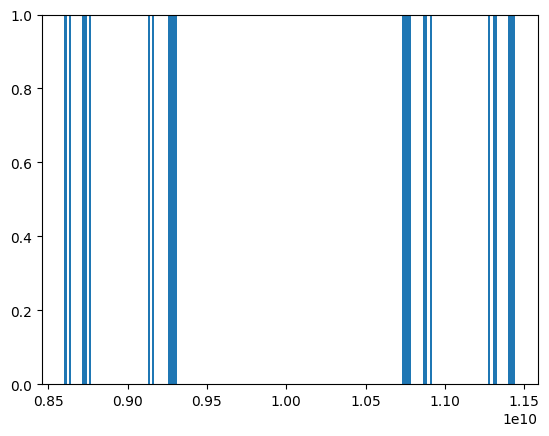

-----------------------------
Lane change file - 2: 


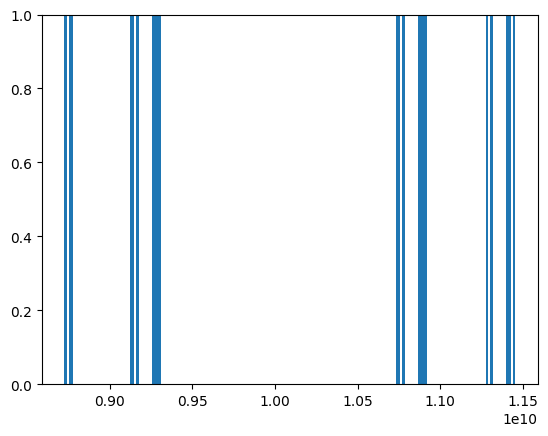

-----------------------------
Lane change file - 3: 


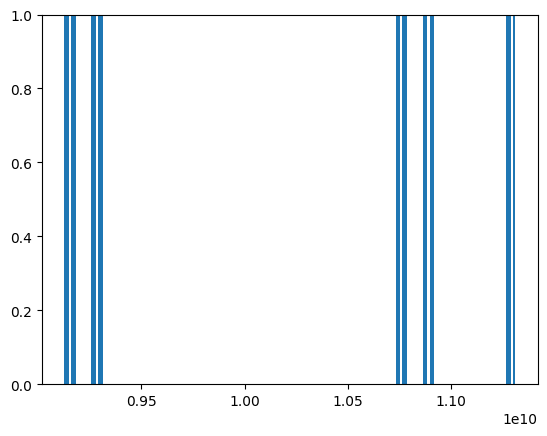

-----------------------------
Lane change file - 4: 


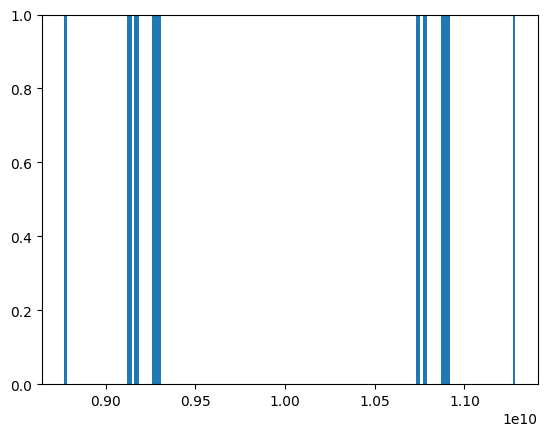

-----------------------------
Lane change file - 5: 


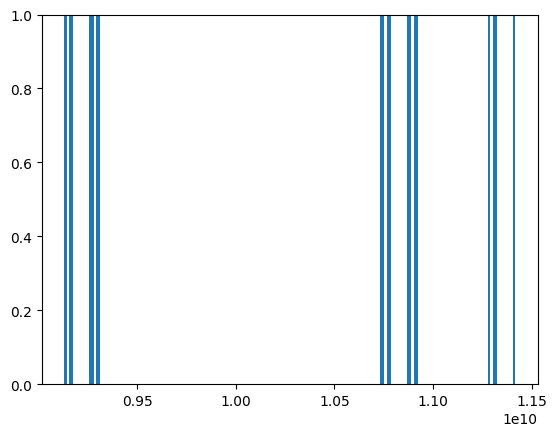

-----------------------------
Lane change file - 6: 


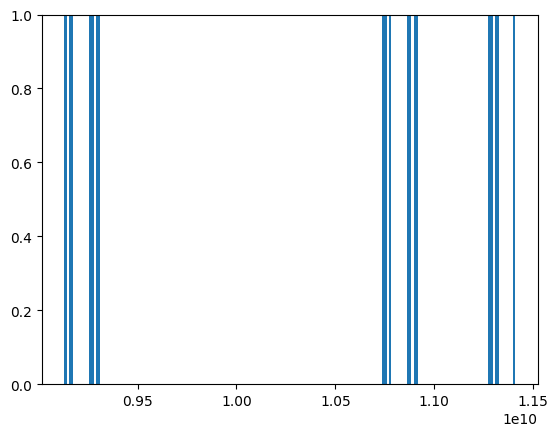

-----------------------------
Lane change file - 7: 


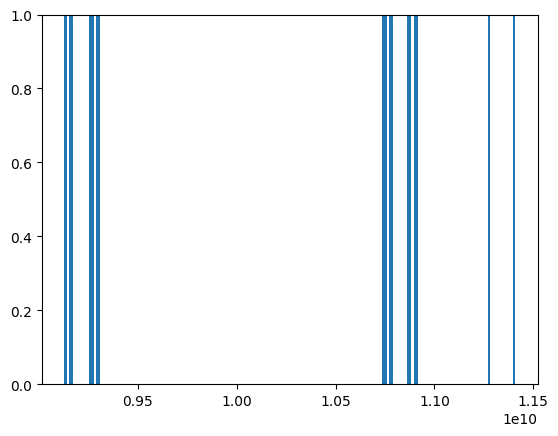

-----------------------------
Lane change file - 8: 


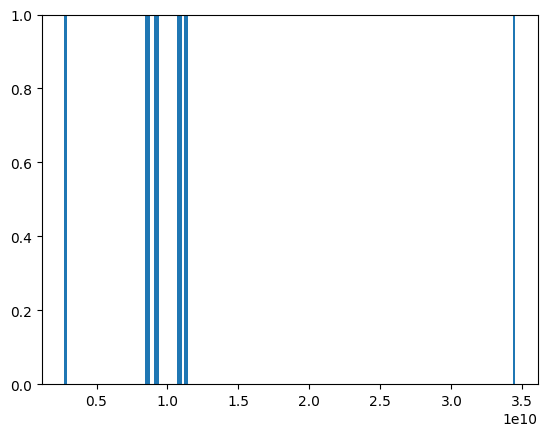

-----------------------------
Lane change file - 9: 


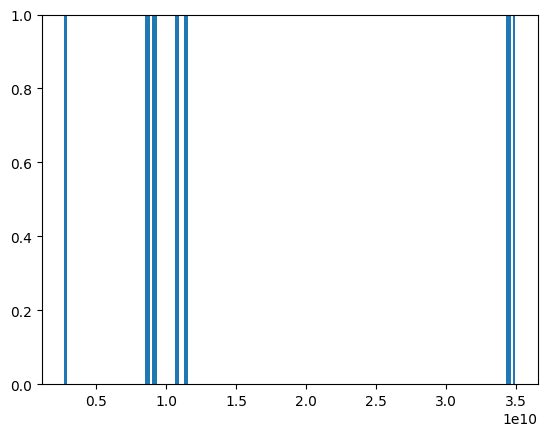

-----------------------------
10
Lane change file - 1: 


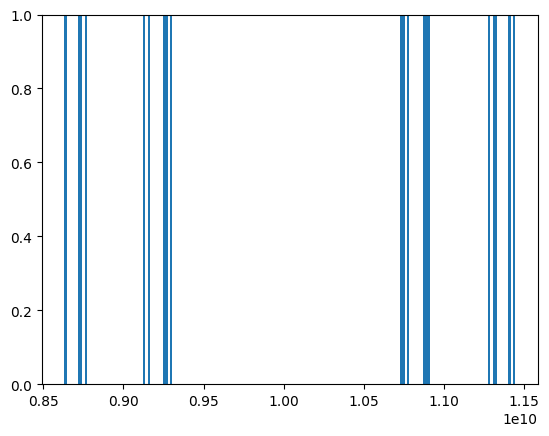

-----------------------------
Lane change file - 2: 


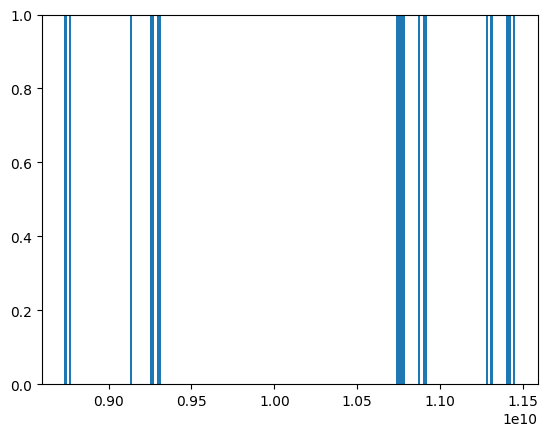

-----------------------------
Lane change file - 3: 


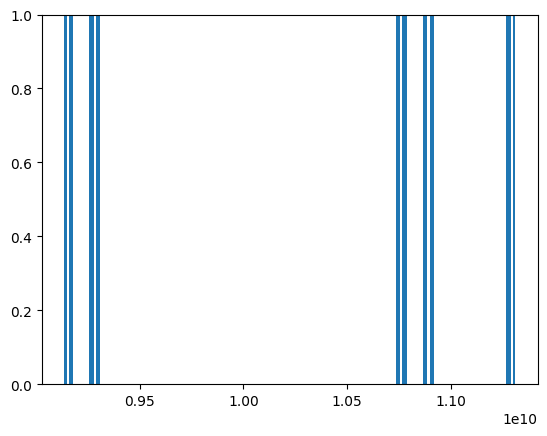

-----------------------------
Lane change file - 4: 


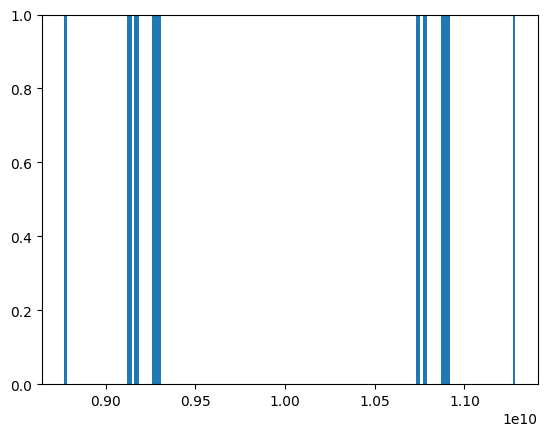

-----------------------------
Lane change file - 5: 


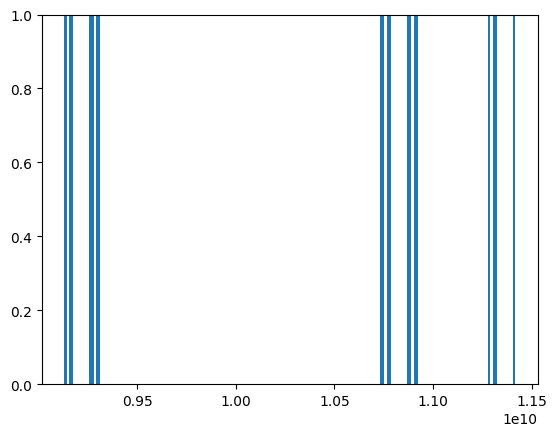

-----------------------------
Lane change file - 6: 


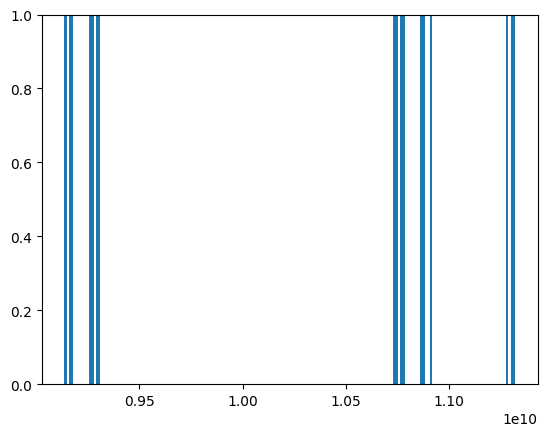

-----------------------------
Lane change file - 7: 


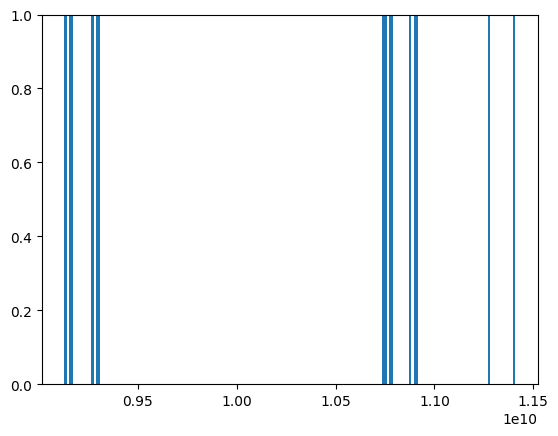

-----------------------------
Lane change file - 8: 


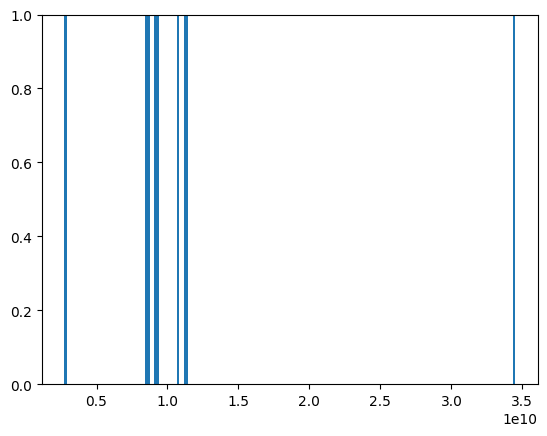

-----------------------------
Lane change file - 9: 


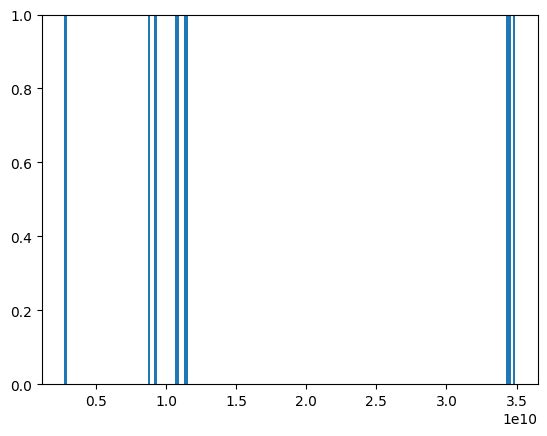

-----------------------------
5
Lane change file - 1: 


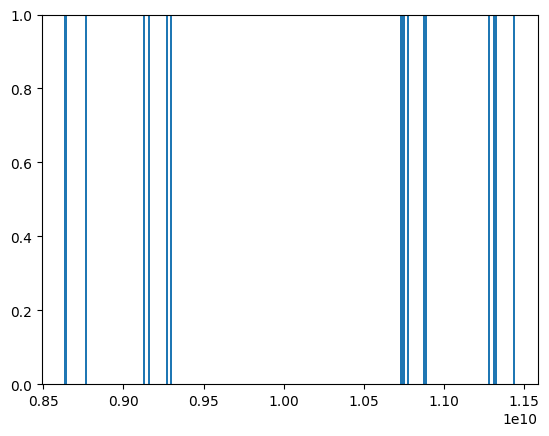

-----------------------------
Lane change file - 2: 


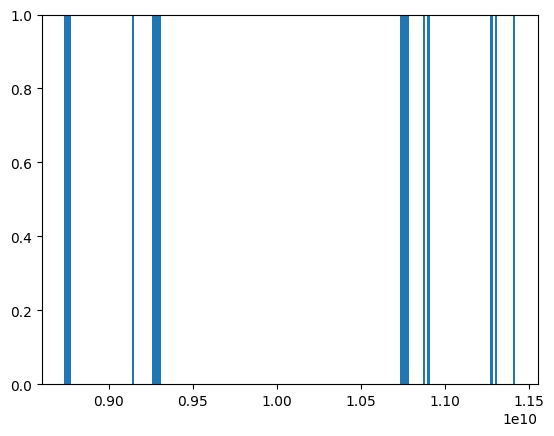

-----------------------------
Lane change file - 3: 


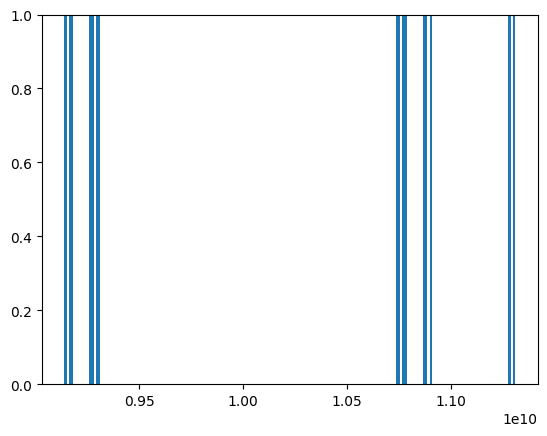

-----------------------------
Lane change file - 4: 


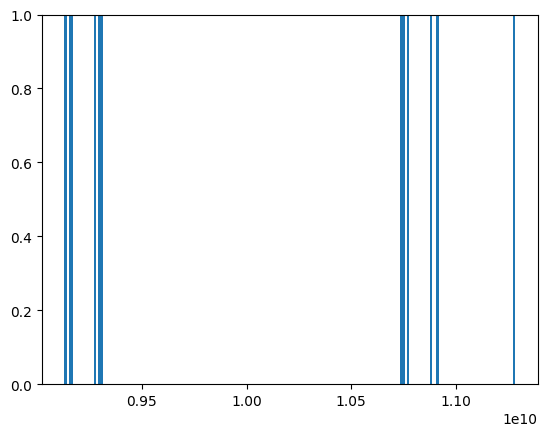

-----------------------------
Lane change file - 5: 


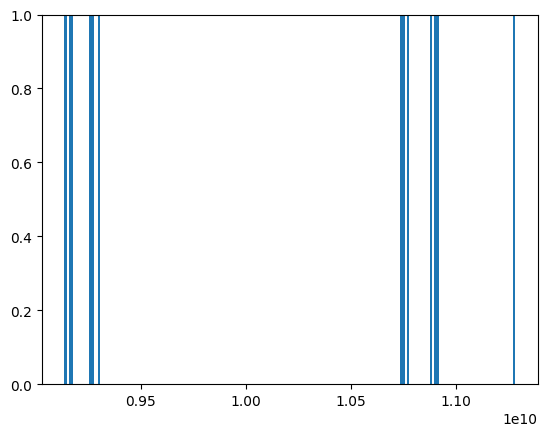

-----------------------------
Lane change file - 6: 


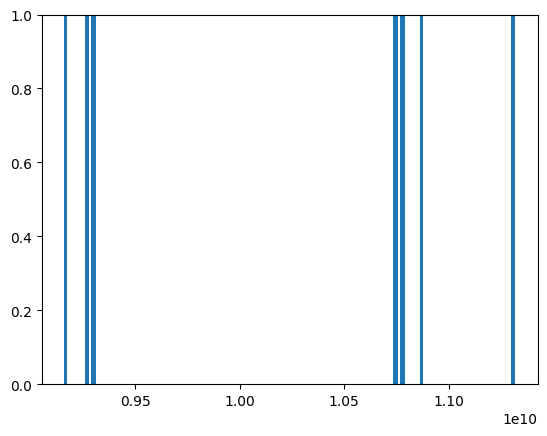

-----------------------------
Lane change file - 7: 


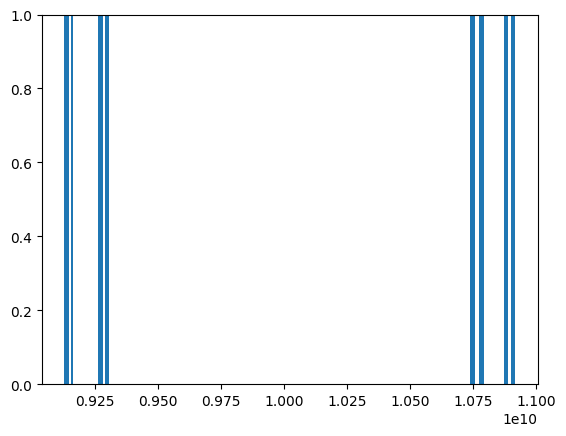

-----------------------------
Lane change file - 8: 


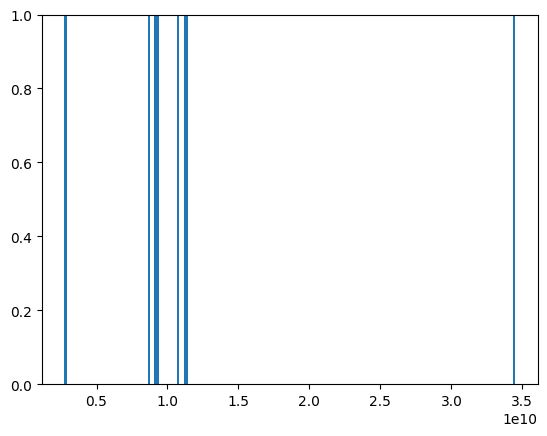

-----------------------------
Lane change file - 9: 


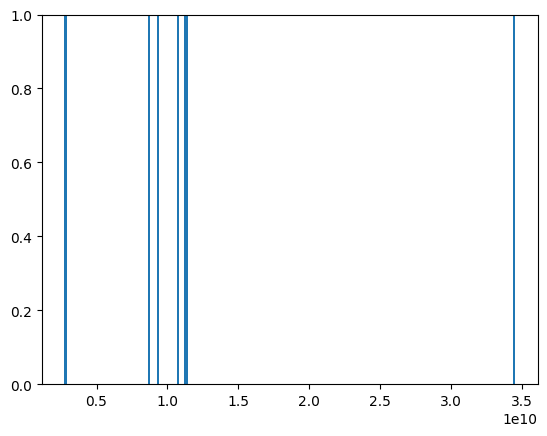

-----------------------------
2


In [46]:
lcCounter = 1 # used to track which lane change the CSP corresponds to.

print("FIRST SET IS 20HZ, SECOND SET IS 10HZ, THIRD SET IS 5 HZ ")

plt.show()
hz = 20
for laneChanges in laneChangeDfs:
    lcCounter = 1
    print("================================================================")
    print("================================================================")
    for df in laneChanges:
        print("Lane change file - " + str(lcCounter) + ": ")

        min = df['morton'].min()
        max = df['morton'].max()
        #max = 30000000000
        #max = 20000000000
        plt.hist(df['morton'], bins=200)
        #plt.xlim(1,max)
        plt.ylim(0,1)
        plt.savefig(str(lcCounter)+'_'+str(hz)+'hz.png')
        plt.show()


        print("-----------------------------")

        lcCounter += 1
    hz = int(hz/2)
    print(hz)